##Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Garmin_Activities.csv')
df.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Training Stress Score®,Grit,Flow,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Walking,11/1/2021 14:00,False,Jersey City Walking,3.51,214,0:40:54,118,164,115,149,11:39,8:14,15,42,0.75,0,0,0,0,0,0:00,0,0:00,No,03:17.2,3,0,0:40:31,0:40:54,-66,-28
1,Walking,10/31/2021 20:21,False,Jersey City Walking,3.16,194,0:34:31,123,177,117,174,10:55,8:38,8,41,0.78,0,0,0,0,0,0:00,0,0:00,No,17:06.2,2,0,0:34:20,0:34:31,-24,15
2,Walking,10/28/2021 13:25,False,Jersey City Walking,3.50,219,0:41:05,113,155,118,181,11:43,8:23,17,37,0.73,0,0,0,0,0,0:00,0,0:00,No,03:24.9,3,0,0:41:04,0:41:05,-54,-17
3,Walking,10/27/2021 14:01,False,Jersey City Walking,3.46,221,0:40:59,129,184,116,188,11:50,7:16,10,40,0.73,0,0,0,0,0,0:00,0,0:00,No,02:53.0,3,0,0:40:27,0:40:59,-35,7
4,Walking,10/25/2021 16:28,False,Hoboken Walking,2.78,187,0:38:58,123,149,106,123,14:00,9:42,34,4,0.68,0,0,0,0,0,0:00,0,0:00,No,17:48.1,2,0,0:37:27,0:38:58,59,94


###DATA CLEANING

In [3]:
df = df.drop(['Favorite', 'Title', 'Max HR', 'Number of Laps', 'Best Lap Time', 'Min Elevation', 'Max Elevation', 'Avg HR', 'Total Ascent', 'Total Descent', 'Avg Vertical Ratio', 'Avg Vertical Oscillation', 'Training Stress Score®', 'Grit', 'Flow', 'Dive Time', 'Min Temp', 'Title', 'Surface Interval', 'Decompression', 'Max Temp'], axis = 1)

In [4]:
df.head()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time
0,Walking,11/1/2021 14:00,3.51,214,0:40:54,115,149,11:39,8:14,0.75,0:40:31,0:40:54
1,Walking,10/31/2021 20:21,3.16,194,0:34:31,117,174,10:55,8:38,0.78,0:34:20,0:34:31
2,Walking,10/28/2021 13:25,3.50,219,0:41:05,118,181,11:43,8:23,0.73,0:41:04,0:41:05
3,Walking,10/27/2021 14:01,3.46,221,0:40:59,116,188,11:50,7:16,0.73,0:40:27,0:40:59
4,Walking,10/25/2021 16:28,2.78,187,0:38:58,106,123,14:00,9:42,0.68,0:37:27,0:38:58


In [5]:
df['Moving Time'] = df['Moving Time'].astype('str')
df['Moving Time'] = df['Moving Time'].str.replace(':', ',')
df['Date'] = pd.to_datetime(df['Date'])
df['Just Date'] = df['Date'].dt.date

In [6]:
ftr = [3600, 60, 1]
i = 0
df['Seconds'] = np.nan
for t in df['Moving Time']:
  df['Seconds'][i] = sum([a*b for a,b in zip(ftr, map(int, t.split(',')))])
  i=i+1
df['Minutes'] = df['Seconds']/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
ftr = [60, 1]
i = 0
df['Pace'] = np.nan
for t in df['Avg Pace']:
  df['Pace'][i] = sum([a*b for a,b in zip(ftr, map(float, t.split(':')))])
  i=i+1
df['Pace'] = df['Pace']/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
df.shape

(280, 16)

In [9]:
df = df[df.Minutes > 10]
print(df.shape)

(250, 16)


In [10]:
df['Calories burned per minute'] = df['Calories']/df['Minutes']
df['Calories burned per minute']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      5.281777
1      5.650485
2      5.332792
3      5.463535
4      4.993324
         ...   
275    5.360738
276    5.818182
277    5.631068
278    5.833333
279    6.292264
Name: Calories burned per minute, Length: 250, dtype: float64

##Rating criteria -

I will define the rating criteria for activities as we analyze the data plots for certain fields like Calorie Burn Rate, Moving Time of the activity, Average Pace, and Average Stride Length. The rating for the activities will be out of a total of **5**, but the importance of each field will vary according to the type of the activity.

###SPLITTING THE ACTIVITIES INTO WALKING AND RUNNING

In [11]:
walk_data = df.loc[df['Activity Type'] == 'Walking']

walk_data.shape

(226, 17)

In [12]:
run_data = df.loc[df['Activity Type'] == 'Running']
run_data.shape

(24, 17)

##WALKING ACTIVITY ANALYSIS

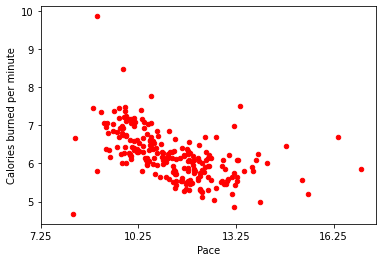

In [13]:
x = walk_data['Pace']
walk_data.plot(kind='scatter', x='Pace', y='Calories burned per minute', color='red')
plt.xticks(np.arange(min(x)-1, max(x), 3.0))
plt.show()

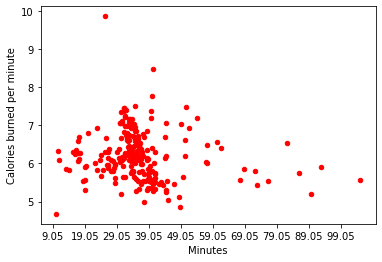

In [14]:
x = walk_data['Minutes']
walk_data.plot(kind='scatter', x='Minutes', y='Calories burned per minute', color='red')
plt.xticks(np.arange(min(x)-1, max(x), 10.0))
plt.show()

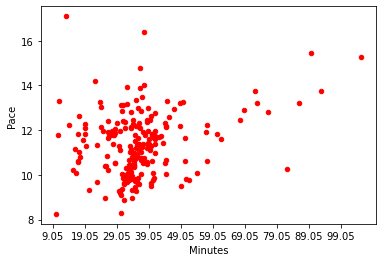

In [15]:
x = walk_data['Minutes']
walk_data.plot(kind='scatter', x='Minutes', y='Pace', color='red')
plt.xticks(np.arange(min(x)-1, max(x), 10.0))
plt.show()

When it comes to walking, Moving Time and Calorie Burn Rate are more important than Average Pace, and Stride Length has no real importance. So we will assign 2 points to Calorie Burn Rate, 2 points to Moving Time, and 1 point to Average Pace.


From the graphs, we can see that -

1) The calorie burn rate is higher for faster pace.

2) The calorie burn rate is slightly higher for short walks.

3) The longer the activity gets, the slower the pace.

The last two points can be justified by the tiredness of longer activities.

In [16]:
walk_data['Rating'] = 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
walk_data.head()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
0,Walking,2021-11-01 14:00:00,3.51,214,0:40:54,115,149,11:39,8:14,0.75,"0,40,31",0:40:54,2021-11-01,2431.0,40.516667,11.650000,5.281777,0.0
1,Walking,2021-10-31 20:21:00,3.16,194,0:34:31,117,174,10:55,8:38,0.78,"0,34,20",0:34:31,2021-10-31,2060.0,34.333333,10.916667,5.650485,0.0
2,Walking,2021-10-28 13:25:00,3.50,219,0:41:05,118,181,11:43,8:23,0.73,"0,41,04",0:41:05,2021-10-28,2464.0,41.066667,11.716667,5.332792,0.0
3,Walking,2021-10-27 14:01:00,3.46,221,0:40:59,116,188,11:50,7:16,0.73,"0,40,27",0:40:59,2021-10-27,2427.0,40.450000,11.833333,5.463535,0.0
4,Walking,2021-10-25 16:28:00,2.78,187,0:38:58,106,123,14:00,9:42,0.68,"0,37,27",0:38:58,2021-10-25,2247.0,37.450000,14.000000,4.993324,0.0


In [18]:
bestpace = walk_data.Pace.min()
worstpace = walk_data.Pace.max()
pacediff = worstpace - bestpace
print(bestpace, worstpace, pacediff)
walk_data['Rating'] = walk_data['Rating'] + 1.0 - ((walk_data['Pace'] - bestpace)/pacediff)

8.25 17.1 8.850000000000001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
bestcalorieburnrate = walk_data['Calories burned per minute'].max()
worstcalorieburnrate = walk_data['Calories burned per minute'].min()
burndiff = bestcalorieburnrate - worstcalorieburnrate
walk_data['Rating'] = walk_data['Rating'] + 2 * ((walk_data['Calories burned per minute'] - worstcalorieburnrate)/burndiff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
bestmovetime = walk_data.Minutes.max()
worstmovetime = walk_data.Minutes.min()
movetimediff = bestmovetime - worstmovetime
walk_data['Rating'] = walk_data['Rating'] + 2 * ((walk_data['Minutes'] - worstmovetime)/movetimediff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
walk_data = walk_data.sort_values('Rating')
walk_data.tail()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
166,Walking,2021-05-07 07:24:00,5.45,390,0:55:04,119,132,10:06,8:23,0.83,"0,54,10",0:56:03,2021-05-07,3250.0,54.166667,10.100000,7.200000,2.692497
260,Walking,2020-06-13 06:01:00,5.28,379,0:51:54,124,245,9:50,4:40,0.82,"0,50,38",0:58:16,2020-06-13,3038.0,50.633333,9.833333,7.485188,2.758497
263,Walking,2020-06-09 07:17:00,4.22,342,0:41:16,123,172,9:47,5:15,0.83,"0,40,18",0:42:21,2020-06-09,2418.0,40.300000,9.783333,8.486352,2.933578
145,Walking,2021-05-16 07:06:00,8.06,537,1:22:49,119,161,10:17,5:02,0.82,"1,22,10",1:44:34,2021-05-16,4930.0,82.166667,10.283333,6.535497,3.003628
262,Walking,2020-06-11 18:41:00,2.88,251,0:25:53,130,168,8:59,5:48,0.86,"0,25,28",0:35:37,2020-06-11,1528.0,25.466667,8.983333,9.856021,3.241130


Looking at the best 5 activities, our scoring scale was a little too harsh for the walking activities. So, I decided to rescale them by rating the best activity as 5.

In [22]:
walk_data['Rating'] = walk_data['Rating'] * 5 / walk_data.Rating.max()

The top 5 walking activities (from #5 to #1) are :

In [23]:
walk_data.tail()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
166,Walking,2021-05-07 07:24:00,5.45,390,0:55:04,119,132,10:06,8:23,0.83,"0,54,10",0:56:03,2021-05-07,3250.0,54.166667,10.100000,7.200000,4.153639
260,Walking,2020-06-13 06:01:00,5.28,379,0:51:54,124,245,9:50,4:40,0.82,"0,50,38",0:58:16,2020-06-13,3038.0,50.633333,9.833333,7.485188,4.255455
263,Walking,2020-06-09 07:17:00,4.22,342,0:41:16,123,172,9:47,5:15,0.83,"0,40,18",0:42:21,2020-06-09,2418.0,40.300000,9.783333,8.486352,4.525548
145,Walking,2021-05-16 07:06:00,8.06,537,1:22:49,119,161,10:17,5:02,0.82,"1,22,10",1:44:34,2021-05-16,4930.0,82.166667,10.283333,6.535497,4.633612
262,Walking,2020-06-11 18:41:00,2.88,251,0:25:53,130,168,8:59,5:48,0.86,"0,25,28",0:35:37,2020-06-11,1528.0,25.466667,8.983333,9.856021,5.000000


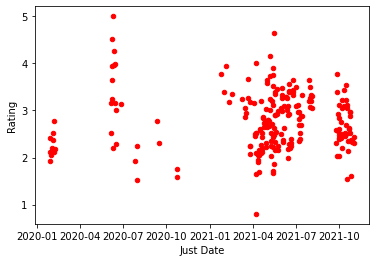

In [41]:
x = walk_data['Just Date']
walk_data.plot(kind='scatter', x='Just Date', y='Rating', color='red')

plt.show()

##RUNNING ACTIVITY ANALYSIS

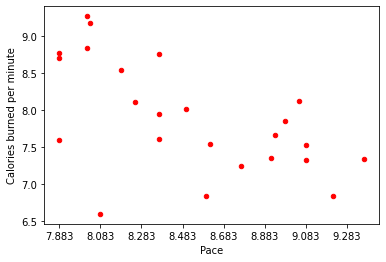

In [24]:
x = run_data['Pace']
run_data.plot(kind='scatter', x='Pace', y='Calories burned per minute', color='red')
plt.xticks(np.arange(min(x), max(x), 0.2))
plt.show()

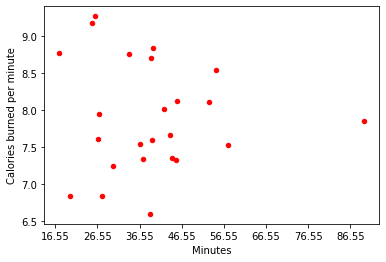

In [25]:
x = run_data['Minutes']
run_data.plot(kind='scatter', x='Minutes', y='Calories burned per minute', color='red')
plt.xticks(np.arange(min(x)-1, max(x), 10.0))
plt.show()

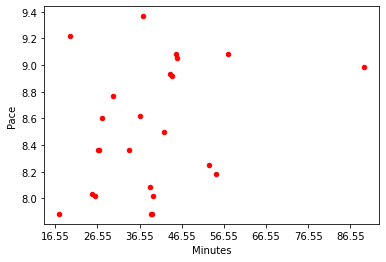

In [26]:
x = run_data['Minutes']
run_data.plot(kind='scatter', x='Minutes', y='Pace', color='red')
plt.xticks(np.arange(min(x)-1, max(x), 10.0))
plt.show()

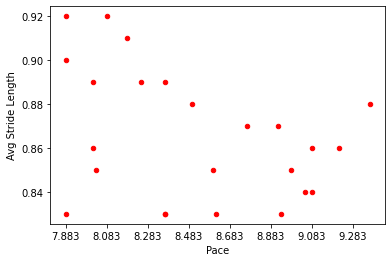

In [27]:
x = run_data['Pace']
run_data.plot(kind='scatter', x='Pace', y='Avg Stride Length', color='red')
plt.xticks(np.arange(min(x), max(x), 0.2))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


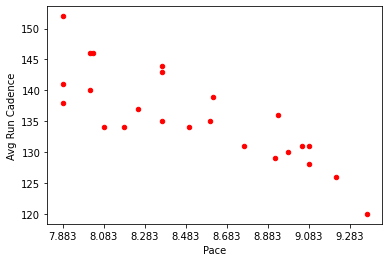

In [28]:
run_data['Avg Run Cadence'] = run_data['Avg Run Cadence'].astype(float)
x = run_data['Pace']
run_data.plot(kind='scatter', x='Pace', y='Avg Run Cadence', color='red')
plt.xticks(np.arange(min(x), max(x), 0.2))
plt.show()

When it comes to running, Stride Length, Average Pace, Moving Time, and Cadence, all are significant things from the perspective of a runner. The Calorie Burn Rate, while essential to someone looking to lose weight, is not really a high priority for a runner. We will assign 1.5 points each to Cadence and Average Pace, and 1 point each to Stride Length and Moving Time.

The essential takeaways from the graphs for running are - 

1) Better stride length usually corresponds to faster pace,

2) Faster pace leads to a generally higher calorie burn rate.

3) Higher the Cadence, better the pace.

In [29]:
run_data['Rating'] = 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
run_data.head()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
41,Running,2021-09-26 05:58:00,3.28,214,0:27:28,143.0,192,8:22,6:17,0.83,"0,26,55",0:27:28,2021-09-26,1615.0,26.916667,8.366667,7.950464,0.0
86,Running,2021-07-11 08:17:00,2.23,154,0:17:34,152.0,169,7:53,6:17,0.83,"0,17,33",0:17:34,2021-07-11,1053.0,17.550000,7.883333,8.774929,0.0
94,Running,2021-07-06 08:14:00,3.24,240,0:26:02,146.0,167,8:01,5:36,0.86,"0,25,54",0:26:02,2021-07-06,1554.0,25.900000,8.016667,9.266409,0.0
95,Running,2021-07-06 07:12:00,3.26,231,0:26:10,146.0,167,8:02,6:21,0.85,"0,25,10",0:26:10,2021-07-06,1510.0,25.166667,8.033333,9.178808,0.0
98,Running,2021-07-04 08:03:00,4.08,299,0:34:09,144.0,169,8:22,6:16,0.83,"0,34,07",0:34:09,2021-07-04,2047.0,34.116667,8.366667,8.764045,0.0


In [31]:
bestpace = run_data.Pace.min()
worstpace = run_data.Pace.max()
pacediff = worstpace - bestpace
#print(bestpace, worstpace, pacediff)
run_data['Rating'] = run_data['Rating'] + (1 - ((run_data['Pace'] - bestpace)/pacediff)) * 1.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
bestcadence = run_data['Avg Run Cadence'].max()
worstcadence = run_data['Avg Run Cadence'].min()
cadencediff = bestcadence - worstcadence
run_data['Rating'] = run_data['Rating'] + 1.5 * ((run_data['Avg Run Cadence'] - worstcadence)/cadencediff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
bestmovetime = run_data.Minutes.max()
worstmovetime = run_data.Minutes.min()
movetimediff = bestmovetime - worstmovetime
run_data['Rating'] = run_data['Rating'] + ((run_data['Minutes'] - worstmovetime)/movetimediff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
beststride = run_data['Avg Stride Length'].max()
worststride = run_data['Avg Stride Length'].min()
stridediff = beststride - worststride
run_data['Rating'] = run_data['Rating'] + ((run_data['Avg Stride Length'] - worststride)/stridediff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
run_data = run_data.sort_values('Rating')
run_data.tail()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
225,Running,2021-03-23 06:08:00,5.01,258,0:40:26,134.0,244,8:05,4:37,0.92,"0,39,05",0:46:34,2021-03-23,2345.0,39.083333,8.083333,6.601279,3.252248
245,Running,2020-07-12 05:58:00,6.69,467,0:54:45,134.0,245,8:11,4:05,0.91,"0,54,40",0:57:45,2020-07-12,3280.0,54.666667,8.183333,8.542683,3.255849
252,Running,2020-06-21 06:11:00,5.01,352,0:40:09,140.0,179,8:01,5:04,0.89,"0,39,50",0:43:25,2020-06-21,2390.0,39.833333,8.016667,8.836820,3.277969
249,Running,2020-06-28 06:15:00,5.02,342,0:39:33,141.0,178,7:53,4:54,0.90,"0,39,19",0:41:02,2020-06-28,2359.0,39.316667,7.883333,8.698601,3.563630
196,Running,2021-04-17 06:03:00,5.05,300,0:39:47,138.0,241,7:53,4:39,0.92,"0,39,31",0:43:14,2021-04-17,2371.0,39.516667,7.883333,7.591733,3.647997


Looking at the best 5 activities, our scoring scale was a little too harsh for the running activities as well. So, I decided to rescale them by rating the best activity as 5.

In [39]:
run_data['Rating'] = run_data['Rating'] * 5 / run_data.Rating.max()

The top 5 walking activities (from #5 to #1) are :

In [40]:
run_data.tail()

,Activity Type,Date,Distance,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Avg Stride Length,Moving Time,Elapsed Time,Just Date,Seconds,Minutes,Pace,Calories burned per minute,Rating
225,Running,2021-03-23 06:08:00,5.01,258,0:40:26,134.0,244,8:05,4:37,0.92,"0,39,05",0:46:34,2021-03-23,2345.0,39.083333,8.083333,6.601279,4.457580
245,Running,2020-07-12 05:58:00,6.69,467,0:54:45,134.0,245,8:11,4:05,0.91,"0,54,40",0:57:45,2020-07-12,3280.0,54.666667,8.183333,8.542683,4.462516
252,Running,2020-06-21 06:11:00,5.01,352,0:40:09,140.0,179,8:01,5:04,0.89,"0,39,50",0:43:25,2020-06-21,2390.0,39.833333,8.016667,8.836820,4.492833
249,Running,2020-06-28 06:15:00,5.02,342,0:39:33,141.0,178,7:53,4:54,0.90,"0,39,19",0:41:02,2020-06-28,2359.0,39.316667,7.883333,8.698601,4.884365
196,Running,2021-04-17 06:03:00,5.05,300,0:39:47,138.0,241,7:53,4:39,0.92,"0,39,31",0:43:14,2021-04-17,2371.0,39.516667,7.883333,7.591733,5.000000


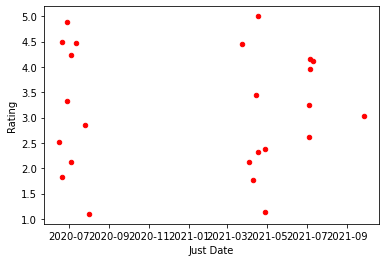

In [42]:
x = run_data['Just Date']
run_data.plot(kind='scatter', x='Just Date', y='Rating', color='red')

plt.show()